<img src='imgs/OOIPY_Logo.png' align="right" width=100>

# OOIPY Demo
This script goes over some of the basic functionality of OOIPY.
## Demo Sections:
- Download Broadband Acoustic Data off of OOI Data Server
- Calculate and Plot Spectrogram and PSDs
- Using Noise Interferometry Toolbox

First let's download some dependancies.

In [2]:
#Import All Dependancies
import numpy as np
from matplotlib import pyplot as plt
import datetime
import time
#from request import hydrophone
import os
import sys
from ooipy.request.hydrophone import get_acoustic_data_conc
import ooipy


# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Short tutorial on how to pull data using multithreading and how to compute PSD estimates

In [8]:
#Specify Time Window Desired and Hydrophone Node
starttime = datetime.datetime(2017,3,20,0,0,0) # time of first sample
endtime = datetime.datetime(2017,3,20,0,1,0) # time of last sample
node = '/LJ01C'

# pulling data using multithreading. Function returns a mask array, but for further processing, the mask
# array can be treated like a regular numpy array
# hyd_data is an ooipy.hydrophone.basic.HydrophoneData object
hyd_data = ooipy.request.hydrophone.get_acoustic_data_conc(starttime, endtime, node=node, data_gap_mode=1)

#computing PSD 
psd = hyd_data.compute_psd_welch()

# psd is object with freqs and values attribute
# psd can also be accesed by hyd_data.psd after calling compute_psd_welch() function
print(psd.values)
print(hyd_data.psd.values)

[ 66.74896857  75.69934991  77.25608625 ..., -13.01373505 -12.63419977
 -18.082648  ]
[ 66.74896857  75.69934991  77.25608625 ..., -13.01373505 -12.63419977
 -18.082648  ]


## Download Broadband Acoustic Data off of OOI Data Server

In [ ]:
#Specify Time Window Desired and Hydrophone Node
starttime = datetime.datetime(2017,3,20,0,0,0) # time of first sample
endtime = datetime.datetime(2017,3,20,0,1,0) # time of last sample
node = '/LJ01C'

hyd_data = ooipy.request.hydrophone.get_acoustic_data_conc(starttime, endtime, node=node, data_gap_mode=1)

type:  <class 'ooipy.hydrophone.basic.HydrophoneData'> 

stats:           network: OO
         station: HYEA1
        location: /LJ01C
         channel: YDH
       starttime: 2017-03-20T00:00:00.000000Z
         endtime: 2017-03-20T00:01:00.000000Z
   sampling_rate: 64000.0
           delta: 1.5625e-05
            npts: 3840001
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 9473, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 4096, 'filesize': 38801408})
      processing: ['ObsPy 1.2.1: trim(endtime=UTCDateTime(2017, 3, 20, 0, 1)::fill_value=None::nearest_sample=True::pad=False::starttime=UTCDateTime(2017, 3, 20, 0, 0))'] 

data:  [-27008.0 -26671.0 -27191.0 ..., -24865.0 -26804.0 -26664.0] 



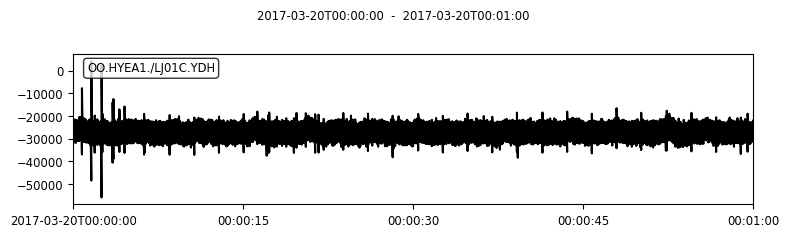

In [29]:
# Access attributes of hyd_data
print('type: ', type(hyd_data), '\n')
print('stats: ', hyd_data.stats, '\n')
print('data: ', hyd_data.data, '\n')

p1 = hyd_data.plot()

In [4]:
# compute and visualize spectrogram for noise data. No start and end time and node have to be defined
# as those are attributes of the OOIHydrophoneData object

# 1. Welch median over a data segment of 0.5s is used to compute the spectrum at each bin
# of the spectrogram
ooi4.compute_spectrogram(avg_time=0.5)
ooi4.spectrogram.freq = ooi4.spectrogram.freq / 1000
ooi4.spectrogram.visualize(title='spectrogram (Welch median)', ylabel='freq [kHz]',
                           fmin=0, fmax=25, vmin=20, vmax=80)

# 2. Periodogram estimate is used to compute the spectrum at each bin of the spectrogram
# To do so, the parameter avg_time is set to None (default). The amount of data are reduced to
# 10s to avoid memory overflow while plotting the data.
start_time2 = datetime.datetime(2016,10,6,0,0,0) # time of first sample
end_time2 = datetime.datetime(2016,10,6,0,0,10) # time of last sample
ooi4.get_acoustic_data(start_time2, end_time2, node='/PC01A')
ooi4.compute_spectrogram(L=2048)
ooi4.spectrogram.freq = ooi2.spectrogram.freq / 1000
ooi4.spectrogram.time = np.linspace(0, 10, len(ooi2.spectrogram.time))
ooi4.spectrogram.visualize(title='spectrogram (periodogram)', ylabel='freq [kHz]',
               xlabel='time [s]', fmin=0, fmax=25, vmin=20, vmax=80)

NameError: name 'ooi4' is not defined

In [5]:
# power spectral density estimate of noise data using Welch's method
fig, ax = plt.subplots(figsize=(22,14), dpi=100)

# 1. using median averaging (default)
ooi1.compute_psd_welch()

f = ooi1.psd.freq / 1000
plt.plot(f, ooi1.psd.values, label='Welch median',color='r')

# 2. using mean averaging
ooi1.compute_psd_welch(avg_method='mean')

plt.plot(f, ooi1.psd.values, label='Welch mean',color='b')
plt.xlabel('frequency [kHz]')
plt.ylabel('SDF [dB re µPa**2/Hz]')
plt.xlim(1,25)
plt.ylim(25,70)
plt.legend()

NameError: name 'ooi1' is not defined

In [6]:
# Spectrogram and PSD using multiprocessing.

# spectrogram
ooi3.compute_spectrogram_mp(avg_time=1)
ooi3.spectrogram.visualize(title='spectrogram (Welch median)', fmin=0, fmax=25000, vmin=20, vmax=80)

# PSD
# Here, each segment has a length of 300s. For each segment a separate PSD estimate is 
# returned.
ooi3.compute_psd_welch_mp(300)

fig, ax = plt.subplots(figsize=(22,14), dpi=100)
f = ooi3.psd_list[0].freq / 1000
for psd in ooi3.psd_list:
    plt.plot(f, psd.values)
    
plt.xlabel('frequency [kHz]')
plt.ylabel('SDF [dB re µPa**2/Hz]')
plt.title('PSD (Welch median)')
plt.xlim(1,25)
plt.ylim(25,70)
plt.show()

NameError: name 'ooi3' is not defined

In [7]:
# test interpolation option in PSD estimates
ooi1.compute_psd_welch().psd.values
psd, f = ooi1.psd.values, ooi1.psd.freq / 1000

ooi1.compute_psd_welch(interpolate=1.0)
psd_interpolated, f_interpolated = ooi1.psd.values, ooi1.psd.freq / 1000


fig, ax = plt.subplots(figsize=(22,14), dpi=100)
plt.plot(f_interpolated, psd_interpolated, label='interpolated',color='b')
plt.plot(f, psd, label='original',color='r')
plt.xlabel('frequency [kHz]')
plt.ylabel('SDF [dB re µPa**2/Hz]')
plt.xlim(1,25)
plt.ylim(25,70)
plt.legend()

NameError: name 'ooi1' is not defined

In [8]:
# test lin/log scale option in PSD estimate
ooi1.compute_psd_welch(scale='log').psd.values
psd_log = ooi1.psd.values

ooi1.compute_psd_welch(scale='lin')
psd_lin, f = ooi1.psd.values, ooi1.psd.freq / 1000


fig, ax = plt.subplots(figsize=(22,14), dpi=100)
plt.plot(f, 10*np.log10(psd_lin), label='lin', color='b')
plt.plot(f, psd_log, label='log', color='r')
plt.xlabel('frequency [kHz]')
plt.ylabel('SDF [dB re µPa**2/Hz]')
plt.xlim(1,25)
plt.ylim(25,70)
plt.legend()

NameError: name 'ooi1' is not defined

# Hydrophone Cross Correlation
This code takes the data from two adjacent hydrophones and averages a cross-correlation over a specified time.

In [9]:
# Demonstrate Cross Correlation Class
# Calculate Xcorr for 2, 10 minutes (20 minute) period and average

num_periods = 2
avg_time = 1 #minutes
start_time = datetime.datetime(2019,2,1,0,0,0) # time of first sample
#Initialize Hydrophone Xcorr Class
hyd_xcorr = ooilib.Hydrophone_Xcorr(node1='/LJ01C',node2='/PC01A', avg_time=avg_time, mp=True)

# Average Cross Correlation Over Specified time
xcorr = hyd_xcorr.avg_over_mult_periods(num_periods, start_time)

dt = 1/64000
t = np.arange(-xcorr.shape[0]*dt/2,xcorr.shape[0]*dt/2,dt)

plt.plot(t,xcorr)
plt.grid()

NameError: name 'ooilib' is not defined